# Unison Project
#### Pradeepta Das, Jill Shah, Apeksha Jain

In [20]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

pd.options.display.float_format = '{:.2%}'.format

# Data Preprocessing

In [21]:
data = pd.read_excel('timeseriesUpdated.xlsx', sheet_name='Sheet1').iloc[2:]
data.columns = data.iloc[0]
data = data.iloc[1:].reset_index().drop(columns = ['index'])
data.set_index('Date', inplace=True)

In [22]:
pd.options.display.float_format = '{:.2f}'.format
data.head()

2,M1US Index,MXEF Index,M1USSC Index,MLCUWXU Index,LBUSTRUU Index,LUCRTRUU Index,BC2YTRUU Index,LUATTRUU Index,LGL1TRUU Index,JPEIDIVR Index,...,GBIEMCOR Index,BCIT1T Index,BRTUTRUU Index,USBMMY3M Index,MXUS0INF Index,HFRIAWC Index,PRIVEXD Index,M1USIRE Index,CSUSHPINSA,NAREIT
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,11085.83,1316.43,727.88,952.58,2311.35,3331.52,255.07,2450.55,4251.2,949.99,...,141.76,351.88,130.77,NaN,892.68,NaN,1973.14,1463.44,NaN,8962.61
2021-02-26,10687.87,1339.26,713.16,932.7,2340.58,3385.44,256.13,2488.92,4472.86,959.23,...,146.25,352.82,134.69,NaN,820.13,NaN,1865.77,1400.81,238.82,8500.61
2021-01-29,10420.14,1329.57,669.87,907.54,2374.87,3445.22,258.32,2534.92,4733.83,984.36,...,150.13,359.43,138.36,NaN,851.75,NaN,1809.54,1350.31,236.33,8248.44
2020-12-31,10520.81,1291.26,645.58,919.38,2392.02,3486.71,257.91,2559.4,4908.6,995.16,...,151.72,358.42,140.29,NaN,867.28,1519.21,1824.41,1348.44,236.31,8261.85
2020-11-30,10108.22,1205.07,598.89,881.32,2388.73,3470.86,257.14,2565.34,4966.07,976.62,...,146.53,354.4,138.0,0.09,867.34,1469.65,1738.74,1305.62,234.45,8040.25


In [23]:
pd.options.display.float_format = '{:.2%}'.format

In [24]:
isNACount = (data.isna().sum())
isNACount

2
M1US Index          0
MXEF Index          0
M1USSC Index       80
MLCUWXU Index       0
LBUSTRUU Index      1
LUCRTRUU Index      2
BC2YTRUU Index     74
LUATTRUU Index      1
LGL1TRUU Index      3
JPEIDIVR Index      7
LF98TRUU Index      1
GBIEMCOR Index    163
BCIT1T Index       33
BRTUTRUU Index    163
USBMMY3M Index    283
MXUS0INF Index    206
HFRIAWC Index     211
PRIVEXD Index     115
M1USIRE Index     246
CSUSHPINSA          1
NAREIT              0
dtype: int64

In [25]:
#keep the indices which have atleast 90% data!
data.dropna(thresh=len(data)*0.9, axis=1, inplace=True)
data = data.astype('float')
data.isna().sum()
print("Out of", len(isNACount), "chosen indices, only", len(data.columns), "remaining ", 
      "after filtering out the series which have a lot of missing data.")

Out of 21 chosen indices, only 11 remaining  after filtering out the series which have a lot of missing data.


In [26]:
#interpolate the missing values, sort using index, take the log!
data = data.interpolate()
data = data.sort_index()
data = np.log(data)

In [27]:
def calcReturns(df, period):
    dfRet = df.diff(period)
    return dfRet.dropna()

def logReturns(df, period):
    logRet = df.diff(period)
    return logRet.dropna()

In [28]:
ret1MLog = logReturns(data, 1).dropna()
ret3MLog = logReturns(data, 3).dropna() 
ret1YLog = logReturns(data, 12).dropna() 
ret3YLog = logReturns(data, 36).dropna()

annualisedVol1MLog = ret1MLog.std() * np.sqrt(12)
annualisedVol3MLog = ret3MLog.std() * np.sqrt(4)
annualisedVol1YLog = ret1YLog.std() * np.sqrt(1)
annualisedVol3YLog = ret3YLog.std() * np.sqrt(1/3)

ret1MAnnulaisedLog = ret1MLog*12
ret3MAnnulaisedLog = ret3MLog*4
ret1YAnnulaisedLog = ret1YLog
ret3YAnnulaisedLog = ret3YLog*(1/3)

# Average Log Annualized Return and Log Annualized Vol

In [29]:
AnnualisedRet = pd.DataFrame()
AnnualisedRet['Ret1MAnnual'] = np.mean(ret1MAnnulaisedLog)
AnnualisedRet['Ret3MAnnual'] = np.mean(ret3MAnnulaisedLog)
AnnualisedRet['Ret1YAnnual'] = np.mean(ret1YAnnulaisedLog)
AnnualisedRet['Ret3YAnnual'] = np.mean(ret3YAnnulaisedLog)
AnnualisedRet.index = list(annualisedVol1MLog.index)
#AnnualisedRet.to_latex()

AnnualisedRet

,Ret1MAnnual,Ret3MAnnual,Ret1YAnnual,Ret3YAnnual
M1US Index,9.44%,9.48%,9.01%,8.23%
MXEF Index,3.73%,3.70%,3.06%,3.28%
MLCUWXU Index,2.57%,2.50%,2.09%,2.11%
LBUSTRUU Index,5.28%,5.34%,5.42%,5.14%
LUCRTRUU Index,6.07%,6.14%,6.16%,5.84%
LUATTRUU Index,4.92%,4.99%,5.14%,4.83%
LGL1TRUU Index,7.17%,7.39%,7.76%,7.15%
JPEIDIVR Index,9.13%,9.40%,9.45%,9.10%
LF98TRUU Index,7.16%,7.18%,7.01%,6.86%
CSUSHPINSA,4.10%,4.09%,4.04%,4.04%


In [30]:
AnnualisedVol = pd.DataFrame()
AnnualisedVol['Vol1MAnnual'] = annualisedVol1MLog
AnnualisedVol['Vol3MAnnual'] = annualisedVol3MLog
AnnualisedVol['Vol1YAnnual'] = annualisedVol1YLog
AnnualisedVol['Vol3YAnnual'] = annualisedVol3YLog
AnnualisedVol.index = list(annualisedVol3YLog.index)
#AnnualisedVol.to_latex()

AnnualisedVol

,Vol1MAnnual,Vol3MAnnual,Vol1YAnnual,Vol3YAnnual
M1US Index,15.21%,15.52%,17.05%,18.78%
MXEF Index,22.84%,25.59%,26.00%,20.99%
MLCUWXU Index,16.44%,17.59%,18.70%,16.53%
LBUSTRUU Index,3.48%,3.58%,3.76%,3.80%
LUCRTRUU Index,5.19%,5.30%,5.26%,4.36%
LUATTRUU Index,4.32%,4.44%,4.29%,4.25%
LGL1TRUU Index,10.13%,10.04%,8.80%,5.49%
JPEIDIVR Index,11.51%,11.54%,10.28%,8.44%
LF98TRUU Index,8.70%,9.96%,10.18%,8.40%
CSUSHPINSA,2.42%,3.95%,5.79%,8.88%


# Log return plots

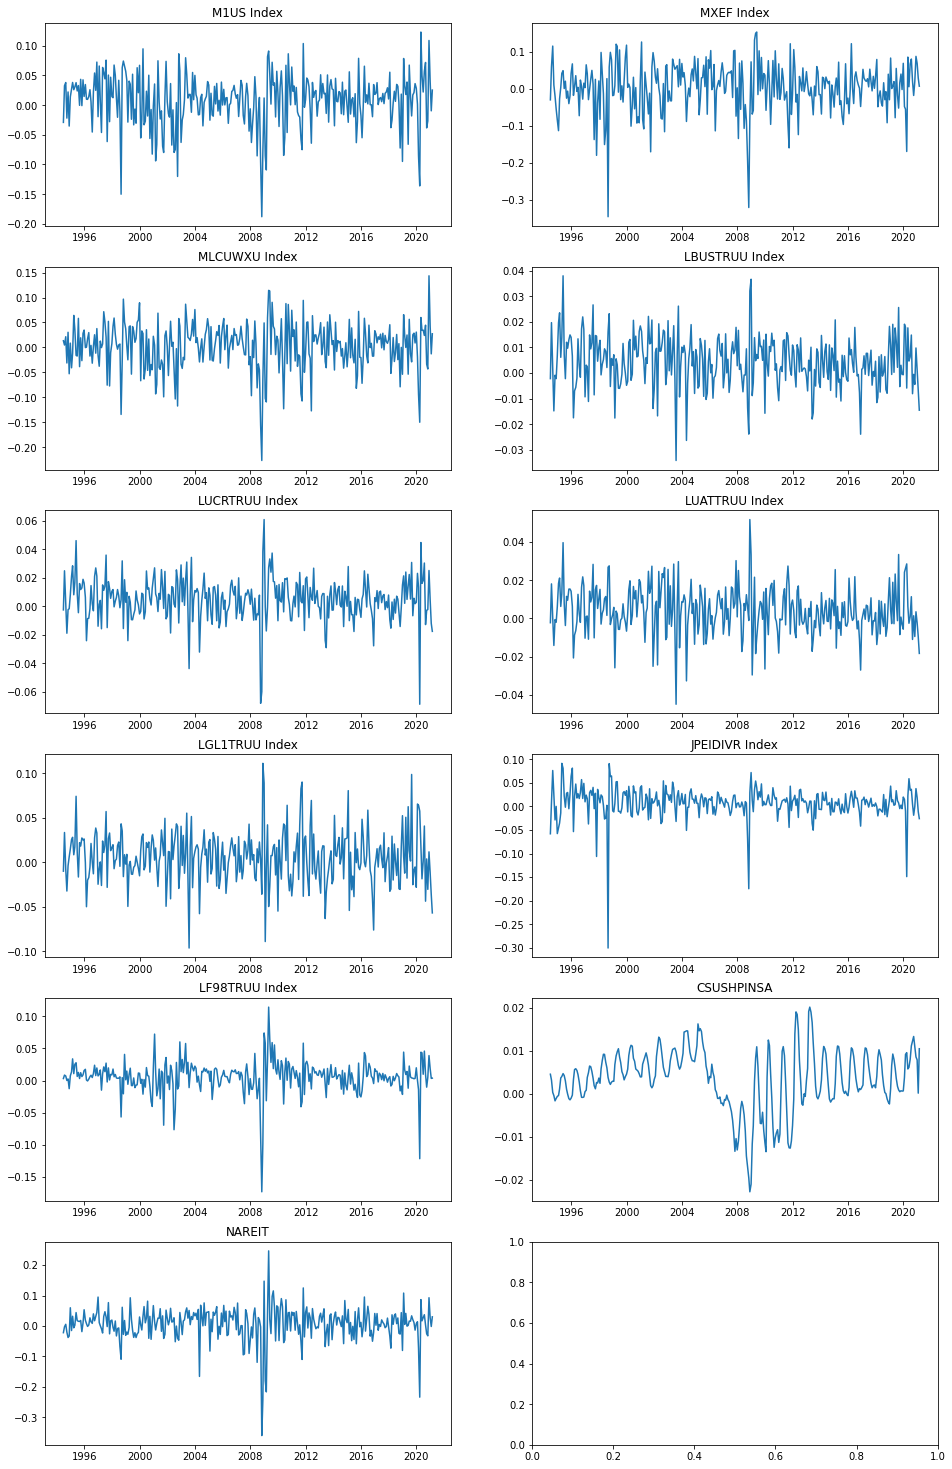

In [31]:
fig, axes = plt.subplots(6, 2, figsize=(16,2))
axs = axes.ravel()
fig.subplots_adjust(top=10)
for i in range(0,len(ret1MLog.columns)):
    axs[i].plot(ret1MLog.iloc[:,i])
    axs[i].set_title(ret1MLog.columns[i])   

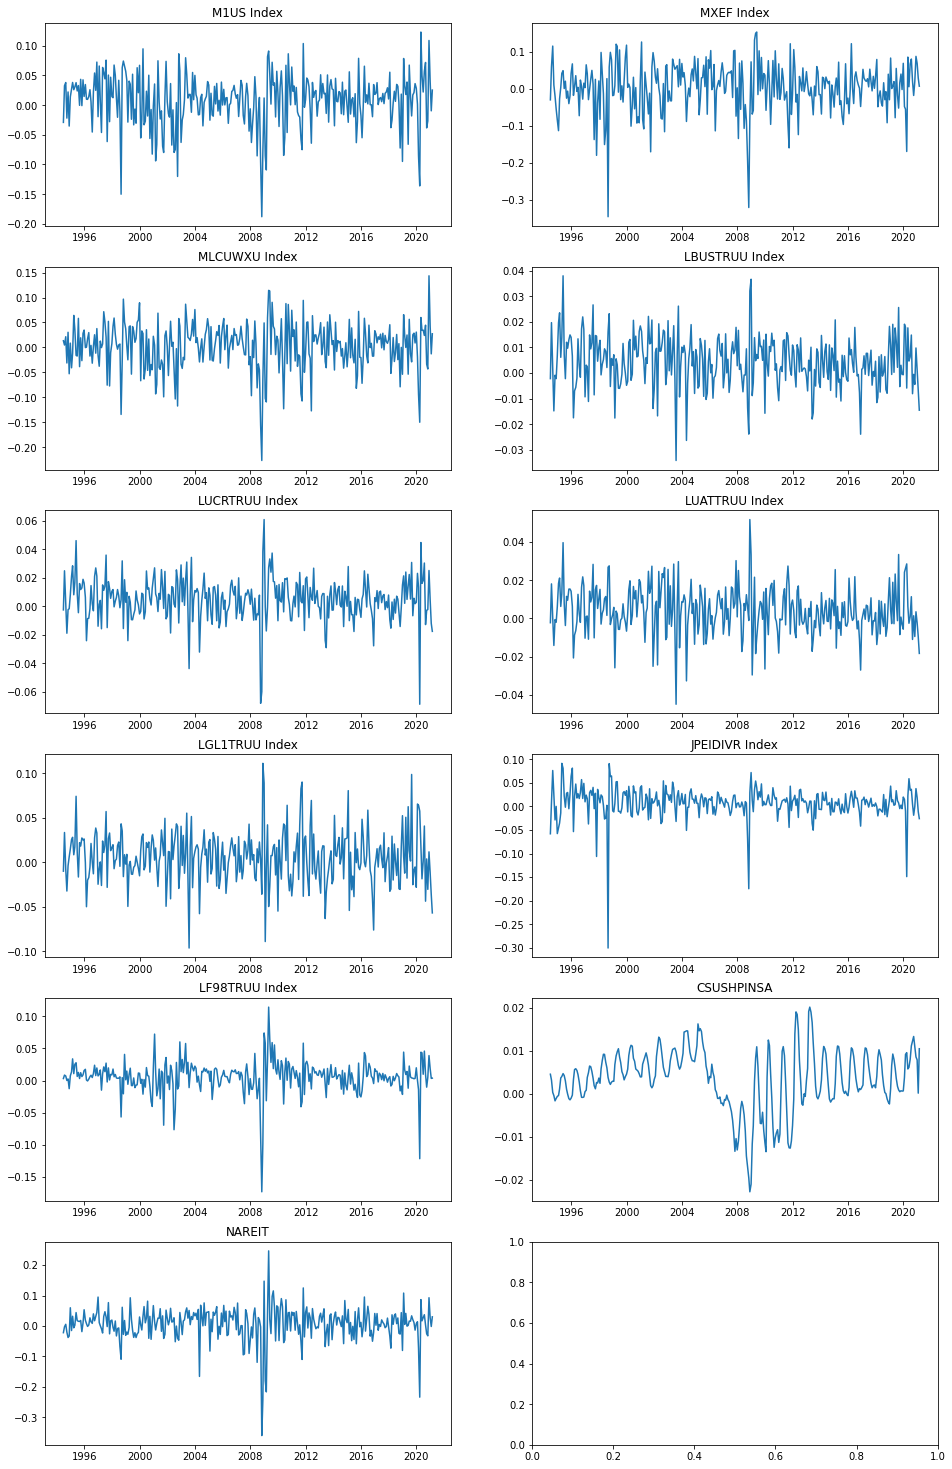

In [32]:
fig, axes = plt.subplots(6, 2, figsize=(16,2))
axs = axes.ravel()
fig.subplots_adjust(top=10)
for i in range(0,len(ret3MLog.columns)):
    axs[i].plot(ret1MLog.iloc[:,i])
    axs[i].set_title(ret1MLog.columns[i])   

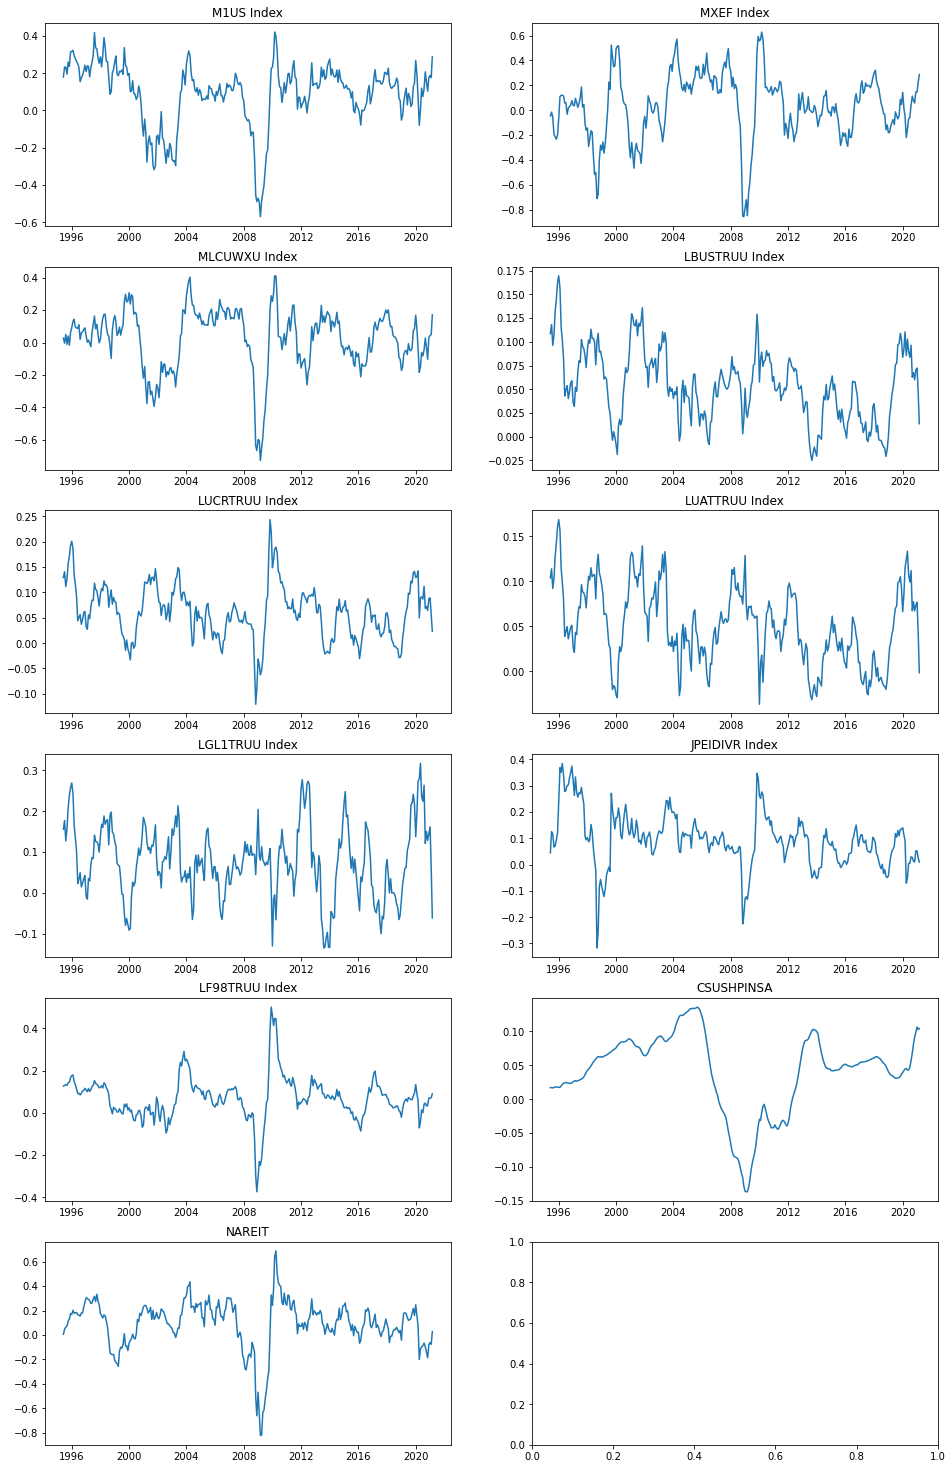

In [33]:
fig, axes = plt.subplots(6, 2, figsize=(16,2))
axs = axes.ravel()
fig.subplots_adjust(top=10)
for i in range(0,len(ret1YLog.columns)):
    axs[i].plot(ret1YLog.iloc[:,i])
    axs[i].set_title(ret1YLog.columns[i])   

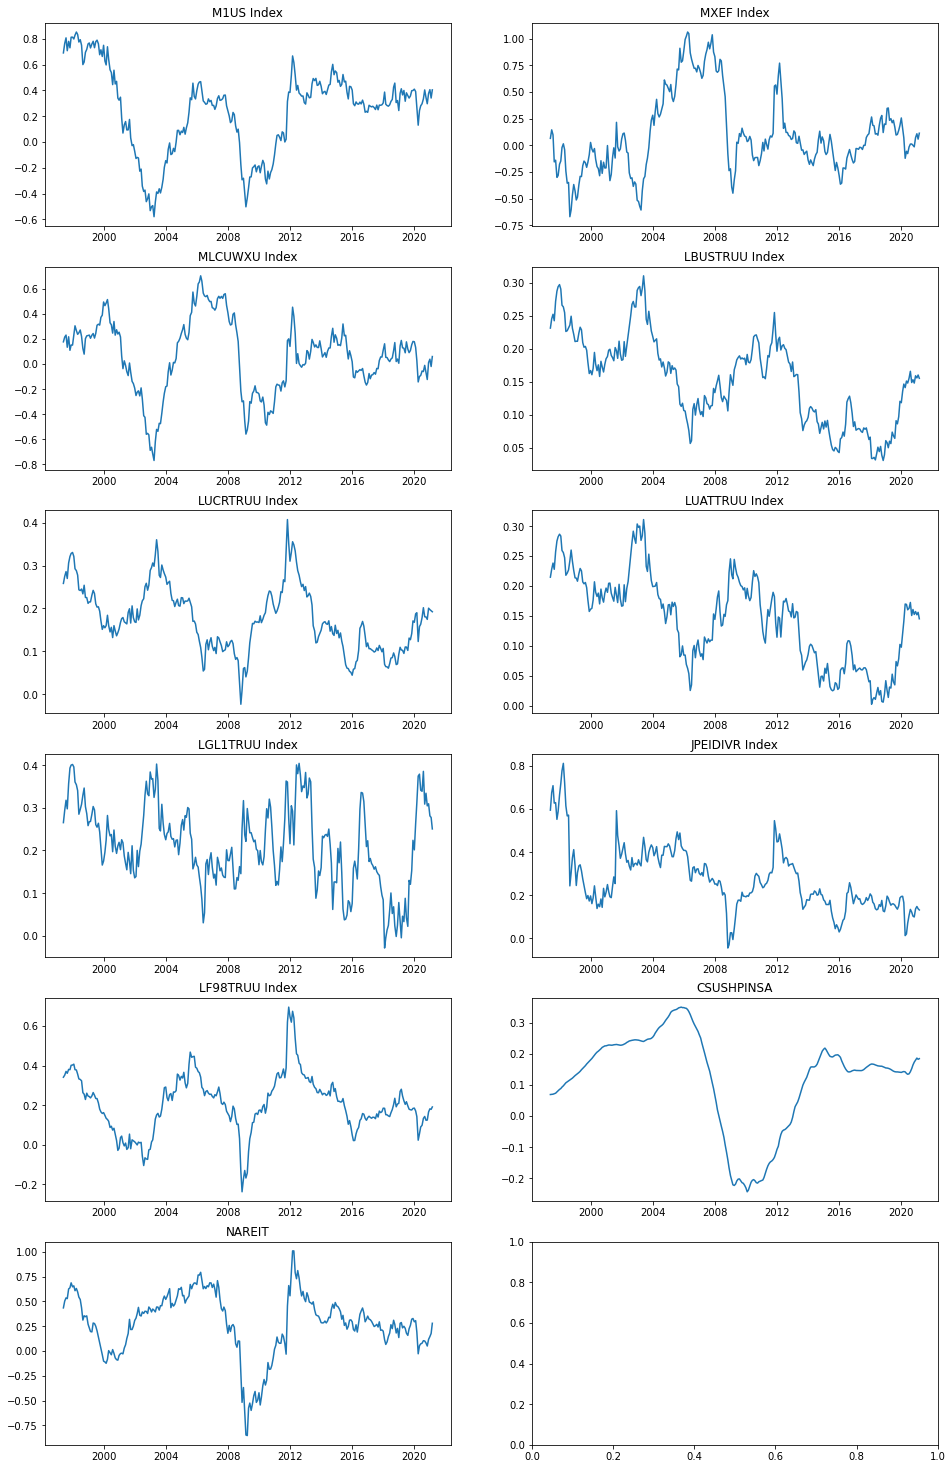

In [34]:
fig, axes = plt.subplots(6, 2, figsize=(16,2))
axs = axes.ravel()
fig.subplots_adjust(top=10)
for i in range(0,len(ret3YLog.columns)):
    axs[i].plot(ret3YLog.iloc[:,i])
    axs[i].set_title(ret3YLog.columns[i])   

# Correlation

In [35]:
ret1MLog.corr()

2,M1US Index,MXEF Index,MLCUWXU Index,LBUSTRUU Index,LUCRTRUU Index,LUATTRUU Index,LGL1TRUU Index,JPEIDIVR Index,LF98TRUU Index,CSUSHPINSA,NAREIT
2,,,,,,,,,,,
M1US Index,100.00%,73.58%,84.48%,0.89%,27.47%,-24.10%,-21.87%,53.33%,65.78%,12.09%,60.16%
MXEF Index,73.58%,100.00%,81.50%,-0.06%,27.21%,-24.23%,-21.22%,68.58%,65.71%,12.29%,51.43%
MLCUWXU Index,84.48%,81.50%,100.00%,0.44%,28.92%,-25.27%,-24.02%,53.90%,66.98%,14.49%,56.73%
LBUSTRUU Index,0.89%,-0.06%,0.44%,100.00%,87.50%,91.04%,86.10%,33.59%,19.99%,-8.27%,20.69%
LUCRTRUU Index,27.47%,27.21%,28.92%,87.50%,100.00%,63.47%,62.99%,52.54%,53.80%,-1.00%,40.70%
LUATTRUU Index,-24.10%,-24.23%,-25.27%,91.04%,63.47%,100.00%,93.69%,10.77%,-15.20%,-13.01%,-3.12%
LGL1TRUU Index,-21.87%,-21.22%,-24.02%,86.10%,62.99%,93.69%,100.00%,12.03%,-11.69%,-9.64%,1.26%
JPEIDIVR Index,53.33%,68.58%,53.90%,33.59%,52.54%,10.77%,12.03%,100.00%,59.43%,3.72%,48.43%
LF98TRUU Index,65.78%,65.71%,66.98%,19.99%,53.80%,-15.20%,-11.69%,59.43%,100.00%,11.76%,64.94%


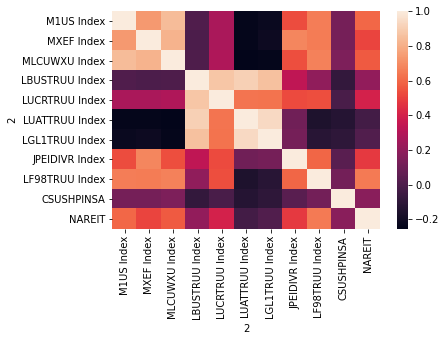

In [36]:
heatMap1 = sns.heatmap(ret1MLog.corr())
#plt.savefig("heatmap1M.png")

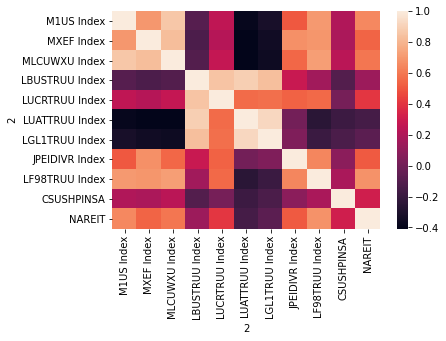

In [37]:
heatMap1 = sns.heatmap(ret3MLog.corr())
#plt.savefig("heatmap3M.png")

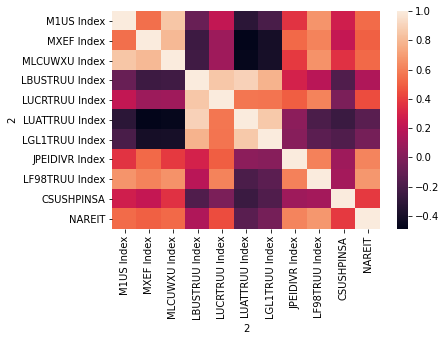

In [38]:
heatMap1 = sns.heatmap(ret1YLog.corr())
plt.savefig("heatmap1Y.png")

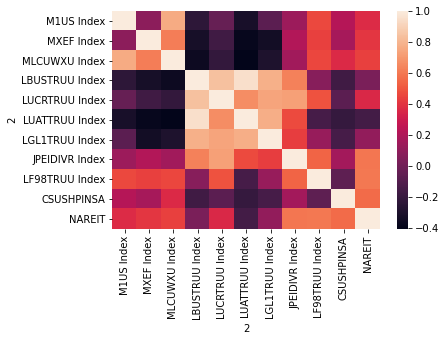

In [39]:
heatMap1 = sns.heatmap(ret3YLog.corr())
plt.savefig("heatmap3Y.png")

Let's use the 1Y return, volatility and correlation!

In [40]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100, 2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp, 2))
    print("Annualised Volatility:", round(sdp, 2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min, 2))
    print("Annualised Volatility:", round(sdp_min, 2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
#display_simulated_ef_with_random(list(AnnualisedRet['Ret1YAnnual']), 
#                                 np.cov(ret1YLog.T), 
#                                 22, 
#                                0.002)

Dropping Case Shiller from the dataset below

In [41]:
stocks_to_be_dropped = ['LUCRTRUU Index','LGL1TRUU Index', 'MLCUWXU Index']
ret1YLog_NEW = ret1YLog.drop(stocks_to_be_dropped, axis=1)
ret1MAnnulaisedLog_NEW = ret1MAnnulaisedLog.drop(stocks_to_be_dropped, axis=1)
ret1MLog = ret1MLog.drop(stocks_to_be_dropped, axis=1)
annualRet_NEW = pd.DataFrame(AnnualisedRet['Ret1YAnnual']).drop(stocks_to_be_dropped)

In [42]:
ret1MLog_wo_cs = ret1MLog.drop('CSUSHPINSA', axis=1)

In [43]:
#beta = 2.1
#alpha = 0.01
#ret1MAnnulaisedLog_NEW['Unison'] = beta * (ret1MLog['CSUSHPINSA'] + alpha)

In [44]:
ind_er = (1 + ret1MLog_wo_cs.mean()) ** 12 - 1
cov_matrix = ret1MLog_wo_cs.cov()

## Unconstrained Optimization

In [62]:
def unconstrainedPO(mu, sigma, gamma = 1):
    import numpy.linalg as LA
    a = mu.shape[1]
    sigmaInv = LA.inv(sigma)
    ones = np.ones(len(sigmaInv)).reshape((a,1))
    term2 = ((mu@sigmaInv@ones)/(ones.T@sigmaInv@ones))
    term2 = term2[0,0]
    term3 = mu.T - term2*ones
    term3 = sigmaInv@term3
    term4 = sigmaInv@ones/(ones.T@sigmaInv@ones)
    h = term3 + term4    
    return h

ret1YLog['Unison'] = 2.1*(ret1YLog['CSUSHPINSA'] + 0.1)
cols = ['M1US Index', 'MXEF Index', 'LBUSTRUU Index', 'LUATTRUU Index', 'JPEIDIVR Index', 'LF98TRUU Index', 'NAREIT','Unison']
ret1YLogFinal = ret1YLog[cols]

cov = np.matrix(ret1YLogFinal.cov())
gamma = 1
mu = np.matrix(ret1YLogFinal.mean())

h = unconstrainedPO(mu,cov)
    
cols = cols
df = pd.DataFrame({'Index Name': cols, 'Weights': weights[0]})
df

,Index Name,Weights
0,M1US Index,12.50%
1,MXEF Index,12.50%
2,LBUSTRUU Index,12.50%
3,LUATTRUU Index,12.50%
4,JPEIDIVR Index,12.50%
5,LF98TRUU Index,12.50%
6,NAREIT,12.50%
7,Unison,12.50%


# MonteCarlo Implementation

In [45]:
def montecarlo():
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights

    num_assets = len(ret1MLog_wo_cs.columns)
    num_portfolios = 50000
    
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                          # weights 
        p_ret.append(returns)
        var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
        sd = np.sqrt(var) # Daily standard deviation
        ann_sd = sd*np.sqrt(12) # Annual standard deviation = volatility
        p_vol.append(ann_sd)
        
    data = {'Returns':p_ret, 'Volatility':p_vol}

    for counter, symbol in enumerate(ret1MLog_wo_cs.columns.tolist()):
        #print(counter, symbol)
        data[symbol+' weight'] = [w[counter] for w in p_weights]
    
    portfolios  = pd.DataFrame(data)
    display(portfolios.head()) # Dataframe of the 10000 portfolios created
    
    #Plot efficient frontier
    #print("Efficient Frontier::")
    #portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])
    
    min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
    # idxmin() gives us the minimum value in the column specified.                               
    print("Min Vol Portfolio::")
    display(min_vol_port)
    
    rf = 0.02 # risk factor
    optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
    display(optimal_risky_port)
    print("Max Sharpe Ratio:", max((portfolios['Returns']-rf)/portfolios['Volatility']))
    
    # Plotting min vol portfolio and optimal portfolio
    print("Efficient Frontier and Min Variance Portfolio and Max Sharpe Ratio Portfolio::")
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_ylim(ymin=0, ymax=0.1)
    ax.set_xlim(xmin=0, xmax=0.2)
    plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
    plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
    plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

,Returns,Volatility,M1US Index weight,MXEF Index weight,LBUSTRUU Index weight,LUATTRUU Index weight,JPEIDIVR Index weight,LF98TRUU Index weight,NAREIT weight
0,5.96%,9.74%,4.86%,30.28%,12.12%,23.76%,10.56%,13.03%,5.38%
1,7.85%,8.56%,13.95%,3.14%,14.04%,20.14%,23.36%,2.35%,23.03%
2,6.04%,6.23%,1.83%,13.04%,23.02%,28.14%,1.32%,25.13%,7.50%
3,7.43%,11.18%,0.71%,19.70%,8.23%,7.89%,27.58%,12.23%,23.67%
4,7.45%,11.60%,20.97%,20.21%,12.63%,5.72%,10.60%,9.39%,20.48%


Min Vol Portfolio::


Returns                  6.04%
Volatility               4.07%
M1US Index weight        9.78%
MXEF Index weight        2.91%
LBUSTRUU Index weight   28.98%
LUATTRUU Index weight   44.98%
JPEIDIVR Index weight    5.47%
LF98TRUU Index weight    6.33%
NAREIT weight            1.55%
Name: 8661, dtype: float64

Returns                  6.59%
Volatility               4.55%
M1US Index weight       10.99%
MXEF Index weight        0.30%
LBUSTRUU Index weight   40.44%
LUATTRUU Index weight   24.77%
JPEIDIVR Index weight   12.85%
LF98TRUU Index weight    8.28%
NAREIT weight            2.38%
Name: 8863, dtype: float64

Max Sharpe Ratio: 1.0085199699760694
Efficient Frontier and Min Variance Portfolio and Max Sharpe Ratio Portfolio::


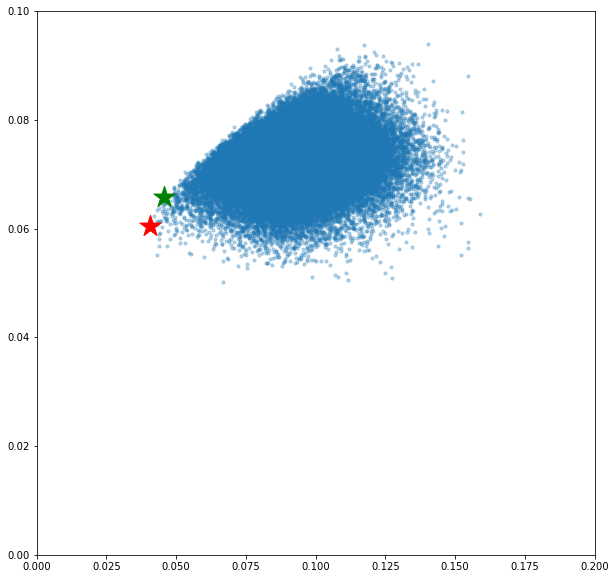

In [46]:
montecarlo()

## PyPfPortfolio Implementation

In [47]:
def pyEffPortFlio(ret): 
    from pypfopt import plotting
    import pandas as pd
    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns
    mu = expected_returns.mean_historical_return(ret, returns_data=True, frequency=12, compounding=False)
    S = risk_models.sample_cov(ret, returns_data=True, frequency=12)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)

    #weights = ef.max_sharpe(risk_free_rate = factors['RF'].mean()*12/100)
    fig, ax = plt.subplots()
    #mkt_std = (mkt.std()*np.sqrt(12)/100)
    #mkt_ret = (mkt.mean()*12/100)
    #xvalues=[0,mkt_std]
    #yvalues=[0.04457,mkt_ret]
    #plt.plot(xvalues,yvalues)
    #xvalues=[0,0.218]
    #yvalues=[0.04457,0.199]
    #plt.plot(xvalues,yvalues)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
    ef.max_sharpe()
    ret_tangent, std_tangent, _ = ef.portfolio_performance(verbose=True)
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Output
    ax.set_title("Efficient Frontier with random portfolios")
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
    plt.show()

Expected annual return: 5.8%
Annual volatility: 3.5%
Sharpe Ratio: 1.07


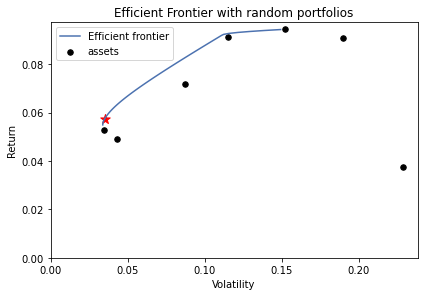

In [48]:
pyEffPortFlio(ret1MLog_wo_cs)

# CVXOPT Implementation

In [49]:
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers
import matplotlib.pyplot as plt

In [50]:
def optimal_portfolio(returns):
    # Turn off progress printing
    solvers.options['show_progress'] = False
    returns = np.asmatrix(returns.T)                # -> (n_assets, n_observations)
    n_assets = len(returns)
    # Vector of desired returns
    N = n_assets*(int(1e+2))
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]
    
    
    # Obtain expected returns and covariance
    m1 = np.mean(returns, axis=1)                       # Mean returns
    c1 = np.cov(returns, bias=True)                     # Volatility (in terms of standard deviation)
    # Convert to cvxopt matrices
    pbar = opt.matrix(m1)
    S = opt.matrix(c1)
    
    # Limits for each stock
    lower_bound = 0.0 #5%
    upper_bound = 1
    # Check error
    if n_assets*lower_bound > 1:
        print('Too many stocks for the lower bound limit.')
        lower_bound = round(1.00/n_assets, 3)
        print('New lower band: ', lower_bound)
    
    upper_bound_array = np.ones((n_assets, 1)) * upper_bound
        
    
    # Create constraint matrices
    G = opt.matrix(np.vstack((-np.eye(n_assets), np.eye(n_assets))))
    #h = opt.matrix(np.vstack((-lower_bound*np.ones((n_assets, 1)), upper_bound*np.ones((n_assets, 1)), 1.2*Benchmark_weights*np.ones((11, 1)))))
    h = opt.matrix(np.vstack((-lower_bound*np.ones((n_assets, 1)), upper_bound_array)))
    A = opt.matrix(1.0, (1, n_assets))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x'] for mu in mus]
    sol = solvers.qp(S, -pbar, G, h, A, b)
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    weights = [np.asarray(x) for x in portfolios]
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]

    return weights, np.asarray(returns), np.asarray(risks), sol, returns, risks

## Optimal Portfolio without Case-Shiller

In [51]:
ret = ret1MLog_wo_cs
weights, returns, risks, sol, plot_return_wo_cs, plot_risk_wo_cs = optimal_portfolio(ret)
ann_returns_wo_cs = (1 + returns)**12 - 1
ann_risks_wo_cs = np.sqrt(12) * risks
sharpe1 = (ann_returns_wo_cs - 0.02)/ann_risks_wo_cs
ind_opt = np.argmax(sharpe1)            # Index of selected portfolio

opt_portfolio = {}
opt_portfolio['return'] = returns[ind_opt] * 12
opt_portfolio['risk'] = risks[ind_opt] * np.sqrt(12)
opt_portfolio['sharpe'] = sharpe1[ind_opt]

wt = weights[ind_opt]/sum(weights[ind_opt])
ind_w = np.flip(np.argsort(wt, axis=0), axis=0)
opt_portfolio['weights'] = wt[ind_w]
ind_w = ind_w.ravel().tolist()
sym1 = pd.DataFrame(list(ret))

sym=sym1.loc[ind_w]

#sym = [str(sym[k][0][0]) for k in range(len(sym))]
opt_portfolio['stocks'] = sym

output = pd.DataFrame(columns=["Ticker","Weights%"])
output["Ticker"] = sym[0]
output["Weights%"] = wt[ind_w]
output = output.reset_index(drop=True)
display(output)
print(opt_portfolio)

,Ticker,Weights%
0,LBUSTRUU Index,85.19%
1,M1US Index,7.85%
2,LF98TRUU Index,5.97%
3,JPEIDIVR Index,0.99%
4,LUATTRUU Index,0.00%
5,NAREIT,0.00%
6,MXEF Index,0.00%


{'return': 0.05756605592770696, 'risk': 0.03517106208680689, 'sharpe': 1.1119782375301672, 'weights': array([[[8.51884331e-01]],

       [[7.85272883e-02]],

       [[5.96615896e-02]],

       [[9.91016888e-03]],

       [[1.57891218e-05]],

       [[6.14080622e-07]],

       [[2.18675002e-07]]]), 'stocks':                 0
2  LBUSTRUU Index
0      M1US Index
5  LF98TRUU Index
4  JPEIDIVR Index
3  LUATTRUU Index
6          NAREIT
1      MXEF Index}


## Optimal Portfolio with Case-Shiller

In [52]:
ret = ret1MLog #ret1MLog*12
weights, returns, risks, sol, plot_return_cs, plot_risk_cs = optimal_portfolio(ret)
ann_returns_cs = (1 + returns)**12 - 1
ann_risks_cs = np.sqrt(12) * risks
sharpe1 = (ann_returns_cs - 0.02)/ann_risks_cs
ind_opt = np.argmax(sharpe1)            # Index of selected portfolio

opt_portfolio = {}
opt_portfolio['return'] = returns[ind_opt] * 12
opt_portfolio['risk'] = risks[ind_opt] * np.sqrt(12)
opt_portfolio['sharpe'] = sharpe1[ind_opt]

wt = weights[ind_opt]/sum(weights[ind_opt])
ind_w = np.flip(np.argsort(wt, axis=0), axis=0)
opt_portfolio['weights'] = wt[ind_w]
ind_w = ind_w.ravel().tolist()
sym1 = pd.DataFrame(list(ret))

sym=sym1.loc[ind_w]

#sym = [str(sym[k][0][0]) for k in range(len(sym))]
opt_portfolio['stocks'] = sym

output = pd.DataFrame(columns=["Ticker","Weights%"])
output["Ticker"] = sym[0]
output["Weights%"] = wt[ind_w]
output = output.reset_index(drop=True)
display(output)
print(opt_portfolio)

,Ticker,Weights%
0,CSUSHPINSA,54.28%
1,LBUSTRUU Index,41.12%
2,M1US Index,2.89%
3,LF98TRUU Index,0.93%
4,JPEIDIVR Index,0.78%
5,LUATTRUU Index,0.00%
6,NAREIT,0.00%
7,MXEF Index,0.00%


{'return': 0.04808291963245642, 'risk': 0.020157701669695136, 'sharpe': 1.4464373588108888, 'weights': array([[[5.42797510e-01]],

       [[4.11185230e-01]],

       [[2.89008908e-02]],

       [[9.30195696e-03]],

       [[7.80931010e-03]],

       [[3.38432855e-06]],

       [[1.12253013e-06]],

       [[5.94927122e-07]]]), 'stocks':                 0
6      CSUSHPINSA
2  LBUSTRUU Index
0      M1US Index
5  LF98TRUU Index
4  JPEIDIVR Index
3  LUATTRUU Index
7          NAREIT
1      MXEF Index}


## Efficient Frontier plots for comparision 

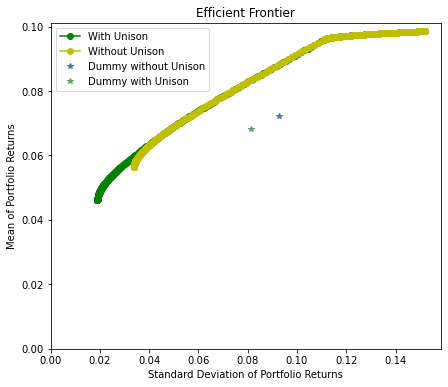

In [53]:
#Plot Efficient Frontier
weights = np.ones((1,7)) * 1/7
returns = np.dot(weights, ind_er)
risk = np.sqrt(weights @ ret1MLog_wo_cs.cov() @ weights.T).values *np.sqrt(12)
ind_er_uni = (1 + ret1MLog.mean())**12 - 1 
weights = np.ones((1,8)) * 1/8
returns_uni = np.dot(weights, ind_er_uni)
risk_uni = np.sqrt(weights @ ret1MLog.cov() @ weights.T).values *np.sqrt(12)
fig, ax = plt.subplots(figsize=(7,6))
plt.plot(ann_risks_cs, ann_returns_cs, 'g-o', label='With Unison')
plt.plot(ann_risks_wo_cs, ann_returns_wo_cs, 'y-o', label='Without Unison')
plt.plot(risk,returns,'*', label='Dummy without Unison')
plt.plot(risk_uni,returns_uni,'*', label='Dummy with Unison')
plt.title('Efficient Frontier')
plt.ylabel('Mean of Portfolio Returns')
plt.xlabel('Standard Deviation of Portfolio Returns')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.legend()

plt.show()

### Sharpe of Dummy Portfolio without Unison

In [54]:
returns/risk

array([[0.78009566]])

### Sharpe of Dummy Portfolio with Unison

In [55]:
returns_uni/risk_uni

array([[0.83990393]])